In [21]:
import os

import pandas as pd
import numpy as np
import torch

from gene_dict import *

In [22]:
file_path = "../../SSN-master/target/brca/ssn_TCGA-A8-A075-01A-11R-A084-07.txt"

df = pd.read_csv(file_path, sep = "\t")

In [23]:
nodes = list(set(df['Gene1'].tolist() + df['Gene2'].tolist()))
num_nodes = len(nodes)
print(num_nodes)
nodes

244


['CDC45',
 'MUC1',
 'SHCBP1',
 'E2F1',
 'CCL11',
 'NPY2R',
 'PRAC2',
 'H1-4',
 'IL19',
 'TFR2',
 'H2AC17',
 'KIF15',
 'CKS2',
 'FAM83D',
 'NR5A1',
 'TTN',
 'CST1',
 'TTK',
 'ASPM',
 'BMP8A',
 'IL33',
 'MUC13',
 'TRIM63',
 'SALL4',
 'SCN1A',
 'ADAMTS5',
 'PBK',
 'H2BC13',
 'MYOG',
 'GTSE1',
 'H2BC18',
 'SPAG5',
 'H3C3',
 'H4C4',
 'H2BC5',
 'FOXM1',
 'GINS1',
 'H2AC16',
 'ACVR1C',
 'CD36',
 'SKA1',
 'TSLP',
 'FGF2',
 'CCNB2',
 'NCAPG',
 'FN1',
 'INHBA',
 'UBE2T',
 'H4C8',
 'NEIL3',
 'KIF18B',
 'NCAPH',
 'CENPE',
 'PAX7',
 'H2BC9',
 'ALDH1A1',
 'IL6',
 'CNIH2',
 'HSD17B6',
 'MMP9',
 'CXCL10',
 'E2F2',
 'DGAT2',
 'CENPM',
 'SPC25',
 'CDKN2A',
 'H4C3',
 'LPL',
 'ANLN',
 'MUC5B',
 'ARTN',
 'CXCL9',
 'CSF3',
 'NBPF4',
 'TOP2A',
 'ZWINT',
 'H2AC20',
 'CDCA8',
 'INMT',
 'H2BC17',
 'WT1',
 'CDC20B',
 'TMPRSS6',
 'CENPF',
 'COL10A1',
 'AMH',
 'RAD51',
 'NTRK2',
 'PCLAF',
 'H2BC4',
 'RAD54L',
 'COMP',
 'ORC6',
 'ESPL1',
 'BUB1B',
 'CDC20',
 'TRIP13',
 'MUC2',
 'PYY',
 'KIF23',
 'H3C8',
 'MKI67',
 

In [24]:
adj = np.zeros((num_nodes, num_nodes))
for _, row in df.iterrows():
    i = nodes.index(row['Gene1'])
    j = nodes.index(row['Gene2'])
    adj[i, j] = row['deltaPCC']
    adj[i,j] = 1
adj

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
import networkx as nx

In [26]:
sample = pd.read_csv(
    file_path, 
    sep = "\t",
    #names=["start_node", "end_node"],
    usecols=[0, 1]
)
sample


,Gene1,Gene2
0,ACAN,COMP
1,ACAN,MMP13
2,ACAN,HAPLN1
3,ACAN,ADAMTS5
4,ACAN,FN1
...,...,...
972,TPX2,TTK
973,TPX2,UBE2C
974,TRIM63,TTN
975,TTK,UBE2C


In [27]:
G = nx.from_pandas_edgelist(sample, "Gene1", "Gene2")
G

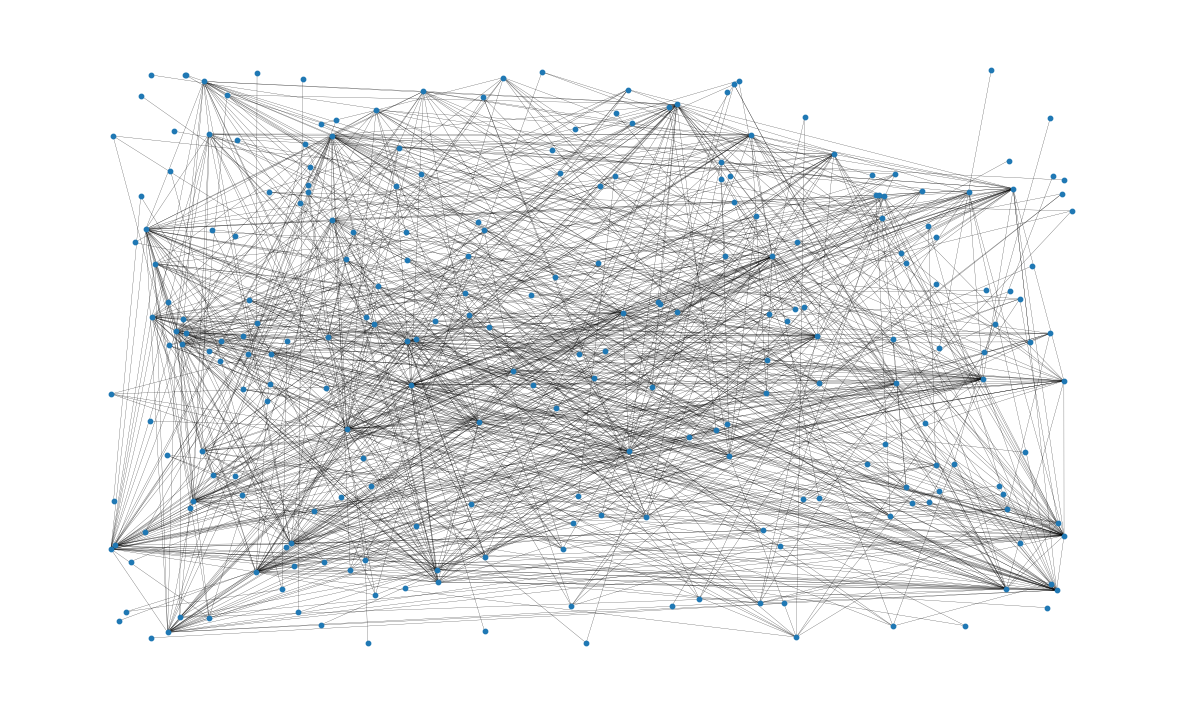

In [28]:
import matplotlib.pyplot as plt
# plot the graph
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=nx.random_layout(G), ax=ax, **plot_options)

In [29]:
G.number_of_nodes()

244

In [30]:
G.number_of_edges()

977

In [43]:
G.degree()

DegreeView({'ACAN': 6, 'COMP': 3, 'MMP13': 2, 'HAPLN1': 1, 'ADAMTS5': 1, 'FN1': 9, 'TNR': 1, 'ACVR1C': 1, 'INHBA': 2, 'ALDH1A1': 1, 'HSD17B6': 2, 'ALDH1A2': 2, 'RDH16': 1, 'AMH': 1, 'NR5A1': 3, 'ANLN': 8, 'DLGAP5': 39, 'KIF23': 22, 'KIF11': 31, 'ASPM': 21, 'BUB1': 42, 'TPX2': 37, 'CEP55': 30, 'KIF20A': 38, 'AOC1': 2, 'INMT': 1, 'IL4I1': 2, 'ARTN': 1, 'RET': 1, 'ASF1B': 2, 'H4C3': 13, 'H4C14': 13, 'AURKA': 24, 'NCAPG': 28, 'CCNB2': 35, 'MELK': 35, 'UBE2C': 34, 'NEK2': 23, 'HJURP': 28, 'KIF2C': 39, 'CCNA2': 44, 'CDCA8': 43, 'PBK': 25, 'KIF4A': 32, 'TTK': 29, 'CDC20': 47, 'ATP1A2': 1, 'SCN1A': 2, 'BUB1B': 29, 'NDC80': 26, 'CDK1': 46, 'CENPA': 37, 'TOP2A': 40, 'PTTG1': 17, 'HMMR': 13, 'BIRC5': 37, 'PLK1': 38, 'AURKB': 32, 'NCAPH': 8, 'CCNB1': 37, 'ESPL1': 19, 'SGO1': 11, 'NUF2': 32, 'KLHL13': 1, 'KIFC1': 6, 'H3C13': 9, 'CENPF': 38, 'ZWINT': 20, 'CDCA3': 18, 'CDCA5': 12, 'PCLAF': 4, 'SPAG5': 12, 'TK1': 2, 'MKI67': 17, 'FOXM1': 15, 'BMP8A': 1, 'BMPR1B': 1, 'CENPE': 23, 'SPC25': 5, 'CDC25C': 

In [31]:
np.mean([d for _, d in G.degree()])

8.008196721311476

In [32]:
#节点特征矩阵[num_nodes, num_node_features]
normal = pd.read_csv(
      '../../DataProcess/normal_matrix.csv',
      header = 0
)
tumor = pd.read_csv(
      '../../DataProcess/tumor_matrix.csv',
      header = 0
)
#avg_count = 
normal.head()

,Unnamed: 0,TCGA-BH-A18V-11A-52R-A12D-07,TCGA-BH-A0BM-11A-12R-A089-07,TCGA-BH-A1F2-11A-32R-A13Q-07,TCGA-BH-A1F8-11B-21R-A13Q-07,TCGA-BH-A18S-11A-43R-A12D-07,TCGA-BH-A0AY-11A-23R-A089-07,TCGA-BH-A0DG-11A-43R-A12P-07,TCGA-BH-A0C0-11A-21R-A089-07,TCGA-BH-A0BA-11A-22R-A19E-07,...,TCGA-BH-A1FJ-11B-42R-A13Q-07,TCGA-AC-A2FB-11A-13R-A17B-07,TCGA-BH-A0H7-11A-13R-A089-07,TCGA-BH-A1FU-11A-23R-A14D-07,TCGA-BH-A0BC-11A-22R-A089-07,TCGA-BH-A0AU-11A-11R-A12P-07,TCGA-AC-A23H-11A-12R-A157-07,TCGA-BH-A0BW-11A-12R-A115-07,TCGA-E2-A1IG-11A-22R-A144-07,TCGA-BH-A18P-11A-43R-A12D-07
0,TSPAN6,0.074845,0.129154,0.150917,0.091106,0.086807,0.107244,0.228022,0.140380,0.097418,...,0.223306,0.130014,0.091425,0.059296,0.096190,0.093562,0.178207,0.064381,0.066125,0.108153
1,TNMD,0.035956,0.008274,0.023237,0.005765,0.033448,0.028739,0.007746,0.009198,0.013423,...,0.038685,0.053428,0.010034,0.005325,0.104348,0.013071,0.010166,0.002289,0.028959,0.030455
2,DPM1,0.063510,0.068552,0.116648,0.066987,0.058527,0.080721,0.090456,0.089761,0.044735,...,0.217535,0.093411,0.108478,0.042012,0.067857,0.061888,0.086574,0.070522,0.050183,0.064669
3,SCYL3,0.105947,0.115731,0.176880,0.089985,0.105046,0.123970,0.252832,0.265963,0.093203,...,0.243435,0.150103,0.178167,0.123713,0.115216,0.177266,0.161432,0.146756,0.061792,0.125644
4,C1orf112,0.009316,0.013492,0.037798,0.018953,0.020666,0.026127,0.043045,0.039940,0.023878,...,0.077524,0.027412,0.027412,0.027305,0.019167,0.035978,0.032016,0.037477,0.013599,0.019274


In [45]:
#构建特征矩阵feature_matrix
import torch
feature_matrix = torch.zeros(G.number_of_nodes(), 2 ,dtype = torch.float)
node_list = list(G.nodes())
sample_id = file_path.split("_")[1].split(".txt")[0]
node_degrees = dict(G.degree())
print(sample_id)
for node,degree in G.degree():
    normal_rows = normal.loc[normal.iloc[:, 0] == node]
    
    sample_count = tumor.loc[tumor.iloc[:,0] == node, tumor.columns == sample_id].values[0,0]

    normal_count_mean = normal_rows.iloc[:, 1:].mean(axis=1).values[0]

    feature_matrix[node_list.index(node), 0] = sample_count - normal_count_mean
    
    feature_matrix[node_list.index(node), 1] = degree
#归一化
feature_matrix[:, 1] = (feature_matrix[:, 1] - feature_matrix[:, 1].min()) / (feature_matrix[:, 1].max() - feature_matrix[:, 1].min())
feature_matrix

TCGA-A8-A075-01A-11R-A084-07


tensor([[ 3.2633e-04,  1.0870e-01],
        [ 2.1697e-01,  4.3478e-02],
        [ 1.5513e-02,  2.1739e-02],
        [ 6.1648e-03,  0.0000e+00],
        [-3.0733e-01,  0.0000e+00],
        [ 2.1801e-01,  1.7391e-01],
        [ 2.9069e-05,  0.0000e+00],
        [-1.1195e-01,  0.0000e+00],
        [ 2.2019e-01,  2.1739e-02],
        [-1.6445e-01,  0.0000e+00],
        [ 1.3183e-01,  2.1739e-02],
        [-9.0107e-02,  2.1739e-02],
        [ 2.0547e-02,  0.0000e+00],
        [ 5.3545e-02,  0.0000e+00],
        [-2.3425e-04,  4.3478e-02],
        [ 1.1573e-01,  1.5217e-01],
        [ 1.6144e-01,  8.2609e-01],
        [ 2.2210e-01,  4.5652e-01],
        [ 2.7910e-01,  6.5217e-01],
        [ 2.4791e-01,  4.3478e-01],
        [ 1.4975e-01,  8.9130e-01],
        [ 1.2027e-01,  7.8261e-01],
        [ 2.6771e-01,  6.3043e-01],
        [ 1.5417e-01,  8.0435e-01],
        [ 2.8517e-02,  2.1739e-02],
        [-2.6744e-01,  0.0000e+00],
        [ 1.9221e-01,  2.1739e-02],
        [ 1.5117e-02,  0.000

In [34]:
from UGtransformer.utils.labels_dict import *
#转换为pyg的图
from torch_geometric.data import InMemoryDataset, Data

x = feature_matrix

adj = nx.to_scipy_sparse_array(G).tocoo()
row = torch.from_numpy(adj.row.astype(np.int64)).to(torch.long)
col = torch.from_numpy(adj.col.astype(np.int64)).to(torch.long)
edge_index = torch.stack([row, col], dim=0)

label_dict = get_lables_dict("brca")

if sample_id in label_dict:
    y = torch.tensor([label_mapping(label_dict[sample_id])])
    
data = Data(x=x, edge_index=edge_index, y=y)
data

Data(x=[244, 1], edge_index=[2, 1954], y=[1])

In [35]:
data.num_edges

1954

In [36]:
data.num_nodes

244

In [37]:
data.y

tensor([2])

In [38]:
data.edge_index

tensor([[  0,   0,   0,  ..., 241, 242, 243],
        [  1,   2,   3,  ..., 242, 241, 226]])

In [39]:
data.x


tensor([[ 3.2633e-04],
        [ 2.1697e-01],
        [ 1.5513e-02],
        [ 6.1648e-03],
        [-3.0733e-01],
        [ 2.1801e-01],
        [ 2.9069e-05],
        [-1.1195e-01],
        [ 2.2019e-01],
        [-1.6445e-01],
        [ 1.3183e-01],
        [-9.0107e-02],
        [ 2.0547e-02],
        [ 5.3545e-02],
        [-2.3425e-04],
        [ 1.1573e-01],
        [ 1.6144e-01],
        [ 2.2210e-01],
        [ 2.7910e-01],
        [ 2.4791e-01],
        [ 1.4975e-01],
        [ 1.2027e-01],
        [ 2.6771e-01],
        [ 1.5417e-01],
        [ 2.8517e-02],
        [-2.6744e-01],
        [ 1.9221e-01],
        [ 1.5117e-02],
        [ 6.5962e-03],
        [ 5.7639e-02],
        [ 4.3634e-04],
        [ 2.6989e-02],
        [ 1.3192e-01],
        [ 3.2031e-01],
        [ 1.9019e-01],
        [ 1.2174e-01],
        [ 1.3999e-01],
        [ 2.1556e-01],
        [ 1.5638e-01],
        [ 5.2244e-02],
        [ 1.1935e-01],
        [ 1.4887e-01],
        [ 1.1929e-01],
        [ 1

In [40]:
import os
print(os.listdir('./'))

['.ipynb_checkpoints', 'brca_gene_dict.txt', 'gat_utils.py', 'gene_dict.py', 'labels_dict.py', 'trans_ssnfile_to_graph.py', 'try_read_as_adj.ipynb', 'util.py', '__init__.py', '__pycache__']


In [41]:
data.x.shape[1]

1

In [46]:
import torch
print(torch.__version__)
import numpy as np
print(np.__version__)
torch.cuda.is_available()

1.12.1
1.24.3


False